In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(train_image,train_label),(test_image,test_label)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_image.shape,train_label.shape

((60000, 28, 28), (60000,))

In [0]:
sample_image=train_image[233]

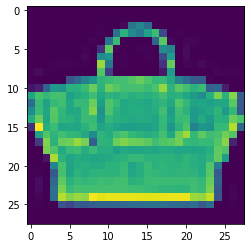

In [5]:
plt.imshow(sample_image)

In [0]:
train_label=tf.one_hot(train_label,depth=10)
test_label=tf.one_hot(test_label,depth=10)

In [7]:
type(train_label)

tensorflow.python.framework.ops.EagerTensor

In [0]:
train_label=train_label.numpy()


In [0]:
test_label=test_label.numpy()

In [10]:
test_label[233]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
train_image=train_image.reshape((-1,28,28,1))
test_image=test_image.reshape((-1,28,28,1))

In [0]:
#Normalization
train_image=train_image/255
test_image=test_image/255

In [12]:
train_image.shape

(60000, 28, 28, 1)

In [0]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.optimizers import Adam

In [40]:
model=keras.Sequential()
model.add(Conv2D(filters=32,kernel_size=(2,2),strides=(1,1),padding='SAME',input_shape=(28,28,1),activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='SAME',activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.3))
model.add(Flatten())
model.add(Dense(units=128,activation=tf.nn.relu))
model.add(Dense(10,activation=tf.nn.softmax))
adam=Adam(learning_rate=0.001)
model.compile(optimizer=adam,loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)              

In [0]:
class MyCallback(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if logs.get('val_accuracy')> 0.95:
      print('Accuracy exceeded. Terminating the training')

      self.model.stop_training=True

In [0]:
epoch_callback=MyCallback()

In [21]:
model.fit(train_image,train_label,epochs=10,validation_data=(test_image,test_label),callbacks=epoch_callback)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4167 - accuracy: 0.8505 - val_loss: 0.3434 - val_accuracy: 0.8761
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2761 - accuracy: 0.8984 - val_loss: 0.2870 - val_accuracy: 0.8938
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2331 - accuracy: 0.9147 - val_loss: 0.2591 - val_accuracy: 0.9071
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2019 - accuracy: 0.9263 - val_loss: 0.2437 - val_accuracy: 0.9123
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1746 - accuracy: 0.9357 - val_loss: 0.2416 - val_accuracy: 0.9168
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1515 - accuracy: 0.9438 - val_loss: 0.2422 - val_accuracy: 0.9151
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1322 - accuracy: 0.9503 - val_loss: 0.2347 - val_ac

In [27]:
model.fit(train_image,train_label,epochs=10,validation_data=(test_image,test_label),callbacks=epoch_callback)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1123 - accuracy: 0.9580 - val_loss: 0.2560 - val_accuracy: 0.9185
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0974 - accuracy: 0.9629 - val_loss: 0.2701 - val_accuracy: 0.9203
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0825 - accuracy: 0.9694 - val_loss: 0.2955 - val_accuracy: 0.9118
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0699 - accuracy: 0.9740 - val_loss: 0.3079 - val_accuracy: 0.9142
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0606 - accuracy: 0.9778 - val_loss: 0.3275 - val_accuracy: 0.9169
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0521 - accuracy: 0.9805 - val_loss: 0.3367 - val_accuracy: 0.9191
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0449 - accuracy: 0.9833 - val_loss: 0.3571 - val_ac

In [31]:
model.fit(train_image,train_label,epochs=10,validation_data=(test_image,test_label),callbacks=epoch_callback)

Epoch 1/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.7860 - accuracy: 0.8166 - val_loss: 0.5232 - val_accuracy: 0.8519
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4534 - accuracy: 0.8687 - val_loss: 0.4547 - val_accuracy: 0.8654
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4055 - accuracy: 0.8796 - val_loss: 0.4076 - val_accuracy: 0.8788
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3782 - accuracy: 0.8876 - val_loss: 0.3967 - val_accuracy: 0.8826
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3552 - accuracy: 0.8923 - val_loss: 0.3947 - val_accuracy: 0.8807
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3424 - accuracy: 0.8951 - val_loss: 0.3758 - val_accuracy: 0.8824
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3293 - accuracy: 0.9003 - val_loss: 0.3605 - val_ac

In [32]:
model.fit(train_image,train_label,epochs=10,validation_data=(test_image,test_label),callbacks=epoch_callback)

Epoch 1/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2970 - accuracy: 0.9105 - val_loss: 0.3448 - val_accuracy: 0.8947
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2919 - accuracy: 0.9125 - val_loss: 0.3420 - val_accuracy: 0.8982
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2863 - accuracy: 0.9135 - val_loss: 0.3389 - val_accuracy: 0.8968
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2829 - accuracy: 0.9146 - val_loss: 0.3546 - val_accuracy: 0.8910
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2760 - accuracy: 0.9169 - val_loss: 0.3423 - val_accuracy: 0.8945
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2704 - accuracy: 0.9187 - val_loss: 0.3379 - val_accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2675 - accuracy: 0.9201 - val_loss: 0.3324 - val_ac

In [34]:
model.fit(train_image,train_label,epochs=20,validation_data=(test_image,test_label),callbacks=epoch_callback)

Epoch 1/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5875 - accuracy: 0.8347 - val_loss: 0.4390 - val_accuracy: 0.8654
Epoch 2/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3984 - accuracy: 0.8760 - val_loss: 0.3788 - val_accuracy: 0.8822
Epoch 3/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3531 - accuracy: 0.8861 - val_loss: 0.3435 - val_accuracy: 0.8904
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3260 - accuracy: 0.8949 - val_loss: 0.3399 - val_accuracy: 0.8929
Epoch 5/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3082 - accuracy: 0.9000 - val_loss: 0.3309 - val_accuracy: 0.8901
Epoch 6/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2949 - accuracy: 0.9062 - val_loss: 0.3324 - val_accuracy: 0.8900
Epoch 7/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2837 - accuracy: 0.9087 - val_loss: 0.3105 - val_ac

In [36]:
model.fit(train_image,train_label,epochs=20,validation_data=(test_image,test_label),callbacks=epoch_callback)

Epoch 1/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4178 - accuracy: 0.8497 - val_loss: 0.3461 - val_accuracy: 0.8755
Epoch 2/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2814 - accuracy: 0.8981 - val_loss: 0.2788 - val_accuracy: 0.8984
Epoch 3/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2373 - accuracy: 0.9130 - val_loss: 0.2527 - val_accuracy: 0.9093
Epoch 4/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2094 - accuracy: 0.9215 - val_loss: 0.2453 - val_accuracy: 0.9100
Epoch 5/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1847 - accuracy: 0.9308 - val_loss: 0.2336 - val_accuracy: 0.9163
Epoch 6/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1661 - accuracy: 0.9369 - val_loss: 0.2270 - val_accuracy: 0.9193
Epoch 7/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1467 - accuracy: 0.9463 - val_loss: 0.2412 - val_ac

In [41]:
model.fit(train_image,train_label,epochs=30,validation_data=(test_image,test_label),callbacks=epoch_callback)

Epoch 1/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4396 - accuracy: 0.8404 - val_loss: 0.3422 - val_accuracy: 0.8738
Epoch 2/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3087 - accuracy: 0.8876 - val_loss: 0.3183 - val_accuracy: 0.8819
Epoch 3/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2619 - accuracy: 0.9032 - val_loss: 0.2680 - val_accuracy: 0.9014
Epoch 4/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2290 - accuracy: 0.9159 - val_loss: 0.2483 - val_accuracy: 0.9077
Epoch 5/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2061 - accuracy: 0.9227 - val_loss: 0.2475 - val_accuracy: 0.9092
Epoch 6/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1894 - accuracy: 0.9290 - val_loss: 0.2483 - val_accuracy: 0.9123
Epoch 7/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1750 - accuracy: 0.9340 - val_loss: 0.2419 - val_ac

In [0]:
loss=model.history.history['loss']
val_loss=model.history.history['val_loss']
acc=model.history.history['accuracy']
val_acc=model.history.history['val_accuracy']


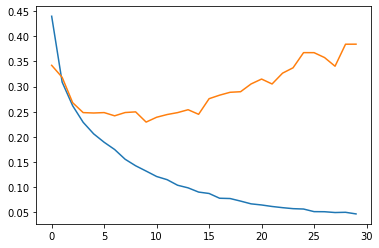

In [43]:
plt.plot(loss)
plt.plot(val_loss)


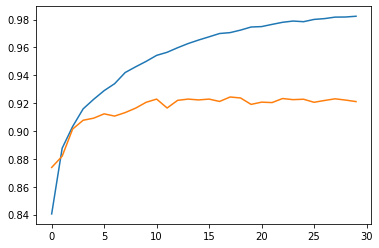

In [44]:
plt.plot(acc)
plt.plot(val_acc)